In [ ]:
del unused_variable
import gc
gc.collect()


NameError: name 'unused_variable' is not defined

In [ ]:

import numpy as np
import re
import nltk
import seaborn as sns
import string
import warnings
from nltk.corpus import stopwords
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Testing_Data.csv to Testing_Data (2).csv
Saving Training_Data.csv to Training_Data (2).csv


In [ ]:
import pandas as pd

trainset=pd.read_csv("/content/drive/MyDrive/stat 653/Training_Data.csv")
testset=pd.read_csv("/content/drive/MyDrive/stat 653/Testing_Data.csv")

In [ ]:
combine = pd.concat([trainset, testset], ignore_index=True, sort=True)
combine.head()

,Brand Name,Price,Product Name,Rating,Review Votes,Reviews
0,NaN,NaN,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,5,0.0,I got my iPhone in 1 week and it's excellent j...
1,Samsung,84.95,Samsung Galaxy S4 Mini I257 16GB Unlocked GSM ...,5,0.0,The phone came defective but in the end it was...
2,HTC,229.99,HTC One VX Unlocked GSM 4G LTE Android Smartph...,1,0.0,The phone was broke when received
3,BLU,99.00,BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...,1,1.0,I got this phone on Friday. I am looking for a...
4,HUAWEI,104.65,"Huawei Ascend Y530, 4GB, Factory Unlocked GSM ...",1,6.0,Is locked (SIM and USIM locked) and do not hav...


In [ ]:
#combine.groupby("Review Votes")["Customer ID"].count().plot.bar()

KeyError: 'Column not found: Customer ID'

In [ ]:
combine['Reviews']=combine['Reviews'].str.replace("[^a-zA-Z#]"," ")
combine.head()

,Brand Name,Price,Product Name,Rating,Review Votes,Reviews
0,NaN,NaN,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,5,0.0,I got my iPhone in 1 week and it's excellent j...
1,Samsung,84.95,Samsung Galaxy S4 Mini I257 16GB Unlocked GSM ...,5,0.0,The phone came defective but in the end it was...
2,HTC,229.99,HTC One VX Unlocked GSM 4G LTE Android Smartph...,1,0.0,The phone was broke when received
3,BLU,99.00,BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...,1,1.0,I got this phone on Friday. I am looking for a...
4,HUAWEI,104.65,"Huawei Ascend Y530, 4GB, Factory Unlocked GSM ...",1,6.0,Is locked (SIM and USIM locked) and do not hav...


In [ ]:
combine['Reviews']=combine['Reviews'].str.findall('\w{4,}').str.join(' ')
combine.head()

,Brand Name,Price,Product Name,Rating,Review Votes,Reviews
0,NaN,NaN,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,5,0.0,iPhone week excellent juss like brand
1,Samsung,84.95,Samsung Galaxy S4 Mini I257 16GB Unlocked GSM ...,5,0.0,phone came defective resolved seller problem r...
2,HTC,229.99,HTC One VX Unlocked GSM 4G LTE Android Smartph...,1,0.0,phone broke when received
3,BLU,99.00,BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...,1,1.0,this phone Friday looking phone already Very p...
4,HUAWEI,104.65,"Huawei Ascend Y530, 4GB, Factory Unlocked GSM ...",1,6.0,locked USIM locked have spanish language


In [ ]:
combine['Reviews']=combine['Reviews'].astype(str)

In [ ]:
tokenized_review=combine['Reviews'].apply(lambda x: x.split())
tokenized_review

0              [iPhone, week, excellent, juss, like, brand]
1         [phone, came, defective, resolved, seller, pro...
2                            [phone, broke, when, received]
3         [this, phone, Friday, looking, phone, already,...
4           [locked, USIM, locked, have, spanish, language]
                                ...                        
413835    [always, otter, best, oops, when, drop, your, ...
413836                                               [like]
413837    [STILL, HAVE, IPHONE, AFTER, YEAR, WORKS, GREA...
413838    [Said, phone, Good, condition, There, tiny, pi...
413839    [phone, overall, works, fine, Just, didn, like...
Name: Reviews, Length: 413840, dtype: object

In [ ]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_review= tokenized_review.apply(lambda x: [ps.stem(i) for i in x])

tokenized_review

0                   [iphon, week, excel, juss, like, brand]
1         [phone, came, defect, resolv, seller, problem,...
2                              [phone, broke, when, receiv]
3         [thi, phone, friday, look, phone, alreadi, ver...
4                [lock, usim, lock, have, spanish, languag]
                                ...                        
413835    [alway, otter, best, oop, when, drop, your, ph...
413836                                               [like]
413837    [still, have, iphon, after, year, work, great,...
413838    [said, phone, good, condit, there, tini, pinpr...
413839    [phone, overal, work, fine, just, didn, like, ...
Name: Reviews, Length: 413840, dtype: object

In [ ]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])

combine['Reviews'] = tokenized_review
combine.head()

,Brand Name,Price,Product Name,Rating,Review Votes,Reviews
0,NaN,NaN,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,5,0.0,iphon week excel juss like brand
1,Samsung,84.95,Samsung Galaxy S4 Mini I257 16GB Unlocked GSM ...,5,0.0,phone came defect resolv seller problem realiz...
2,HTC,229.99,HTC One VX Unlocked GSM 4G LTE Android Smartph...,1,0.0,phone broke when receiv
3,BLU,99.00,BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...,1,1.0,thi phone friday look phone alreadi veri phone...
4,HUAWEI,104.65,"Huawei Ascend Y530, 4GB, Factory Unlocked GSM ...",1,6.0,lock usim lock have spanish languag


In [ ]:
#pip install wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
# Create the 'label' column based on the Rating column
combine['label'] = (combine['Rating'] >= 3).astype(int)

# Ensure that the 'Reviews' column is a string, and concatenate the reviews into a single string where the label is 1
positive_reviews = combine.loc[combine['label'] == 1, 'Reviews'].astype(str)
positive_words = ' '.join(text for text in positive_reviews)
pwords = positive_words.split()

#positive_words = ' '.join(text for text in combine['Reviews'][combine['label']==1])
#pwords=positive_words.split()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 653_proj_img.png to 653_proj_img.png


Saving 653_proj_img.png to 653_proj_img (1).png


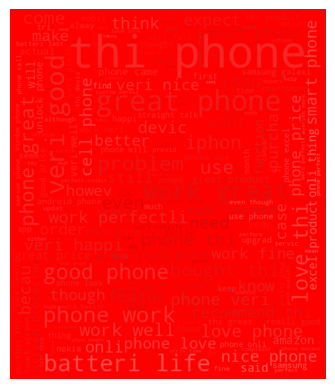

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Upload the mask image file
uploaded = files.upload()

# Now, use the uploaded file's name to open it with Image
mask = np.array(Image.open(list(uploaded.keys())[0]))  # Use the uploaded file's name

# Continue with the rest of your code
image_colors = ImageColorGenerator(mask)
wc = WordCloud(background_color='red', height=1500, width=4000, mask=mask).generate(positive_words)

# Display the generated word cloud
import matplotlib.pyplot as plt
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()


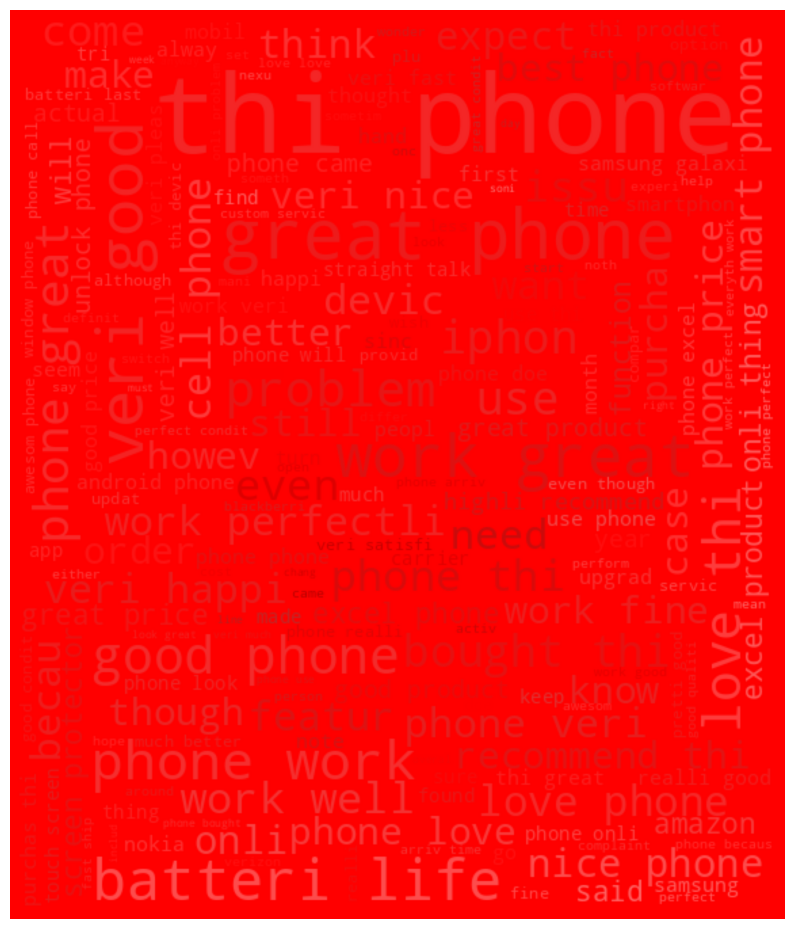

In [ ]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join(text for text in combine['Reviews'][combine['label']==0])
nwords=negative_words.split()

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Upload the mask image file
uploaded = files.upload()

# Now, use the uploaded file's name to open it with Image
mask2 = np.array(Image.open(list(uploaded.keys())[0]))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(mask2)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='blue', height=1500, width=4000,mask=mask2).generate(negative_words)

Saving 653_proj_img2.png to 653_proj_img2.png


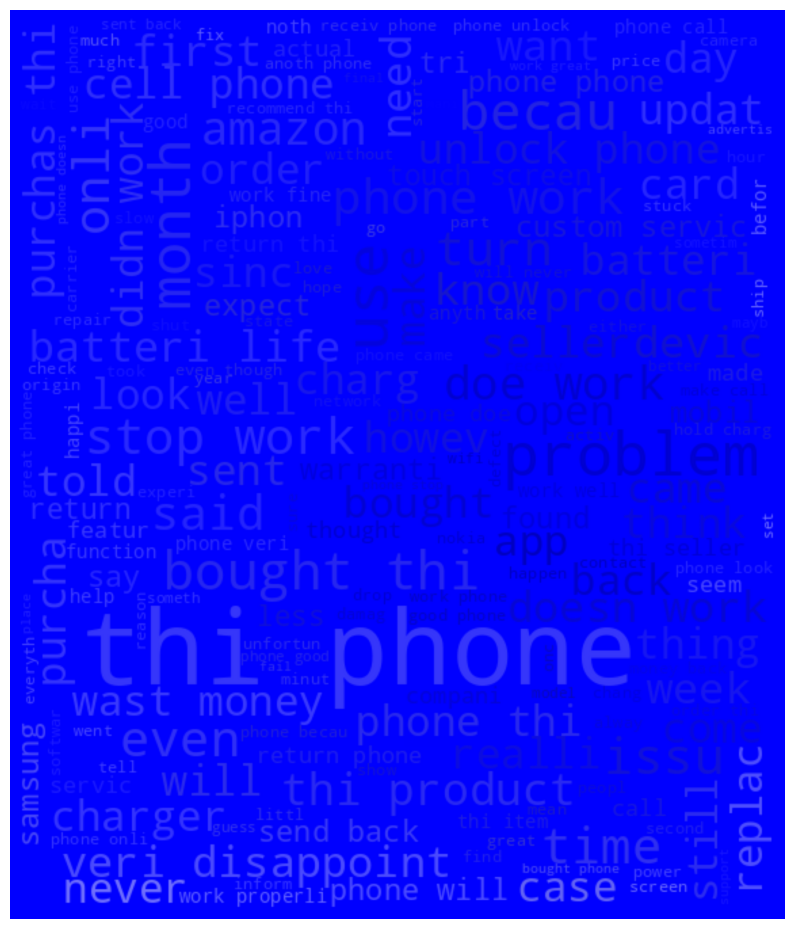

In [ ]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()


In [ ]:
!pip install nltk
import nltk
from nltk import FreqDist

word_freq_positive = nltk.FreqDist(pwords)

word_freq_positive

FreqDist({'phone': 341272, 'thi': 173402, 'with': 133015, 'that': 112321, 'great': 97775, 'have': 90365, 'good': 88985, 'work': 87403, 'veri': 76233, 'love': 57624, ...})

In [ ]:
word_freq_negative=nltk.FreqDist(nwords)
word_freq_negative

FreqDist({'phone': 141602, 'thi': 76867, 'that': 45929, 'with': 42871, 'work': 39832, 'have': 35964, 'screen': 19154, 'when': 19036, 'veri': 18465, 'would': 18244, ...})

In [ ]:
df_positive = pd.DataFrame({'words':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,words,Count
0,iphon,24355
1,week,7608
2,excel,32565
3,juss,7
4,like,54663
5,brand,10142
6,phone,341272
7,came,17127
8,defect,1438
9,resolv,726


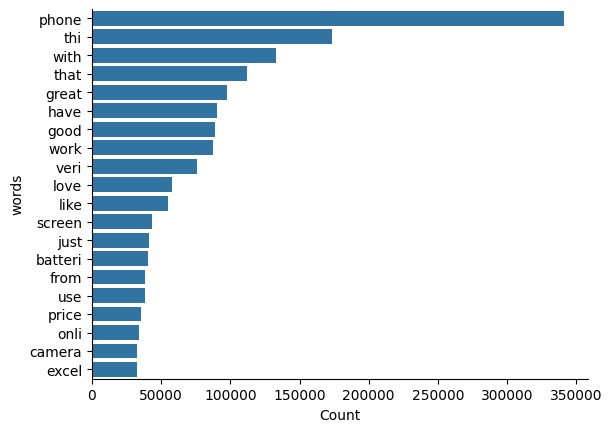

In [ ]:
import seaborn as sns
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='words',x='Count')
sns.despine()

In [ ]:
df_negative = pd.DataFrame({'words':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,words,Count
0,phone,141602
1,broke,2178
2,when,19036
3,receiv,9927
4,thi,76867
5,friday,87
6,look,7714
7,alreadi,2654
8,veri,18465
9,review,4344


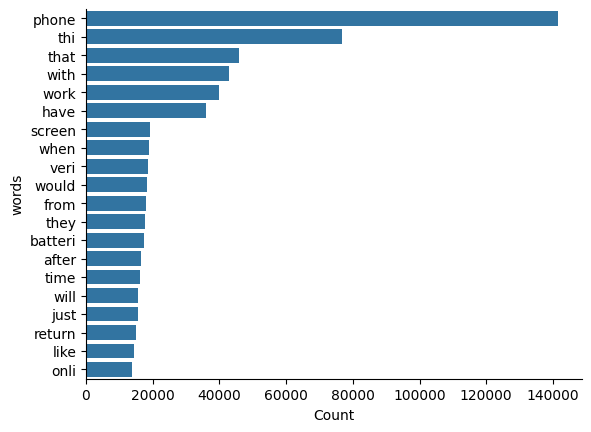

In [ ]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y='words',x='Count')
sns.despine()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Reviews'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
413837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
413838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Reviews'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.round(4)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
413836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
413837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5038,0.0,0.0,0.0
413838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer




train_bow = bow[:297491]

train_bow.todense()

NameError: name 'bow' is not defined

In [ ]:
train_tfidf_matrix = tfidf_matrix[:297491]

train_tfidf_matrix.todense()

In [ ]:
from sklearn.model_selection import train_test_split
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,trainset['label'],test_size=0.3,random_state=3)

In [ ]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,trainset['label'],test_size=0.3
                                                                              ,random_state=17)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [ ]:
Log_Reg.fit(x_train_bow,y_train_bow)

In [ ]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
print(prediction_int)

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

In [ ]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

In [ ]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
print(prediction_int)

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
dct.fit(x_train_bow,y_train_bow)

In [ ]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

In [ ]:
dct.fit(x_train_tfidf,y_train_tfidf)

In [ ]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

In [ ]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,3)])

compare_1.T

In [ ]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [ ]:
Algo_2 = ['LogisticRegression(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,3)])

compare_2.T

In [ ]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [ ]:
Algo_best = ['DecisionTree(Bag-of-Words)','Decision Tree(TF-IDF)']

score_best = [dct_score_bow,dct_score_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

In [ ]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Decision tree(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [ ]:
test_bow = bow[297491:]
test_pred = dct.predict_proba(test_bow)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

testset['Label'] = test_pred_int

submission = testset[['Customer ID','Label']]
submission.to_csv('result.csv', index=False)

In [ ]:
res = pd.read_csv('result.csv')
res

In [ ]:
count=res['Label'].value_counts()
count

In [ ]:
from pandas import DataFrame
lis=[[1,18372],[0,4912]]
dataf=DataFrame(lis,columns=['Label','Count'])
dataf.head()

In [ ]:
res.groupby("Label")["Customer ID"].count().plot.bar()

In [ ]:

res.groupby("Label")["Customer ID"].count().plot.pie()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_valid_tfidf,dct_int_tfidf))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_tfidf,dct_int_tfidf))

In [ ]:
print(classification_report(y_valid_tfidf, prediction_int))#logistic regression using tfidf

In [ ]:
print(classification_report(y_valid_bow, prediction_int))

In [ ]:
print(classification_report(y_valid_bow,dct_int_bow))#decision tree bag of words